<a href="https://colab.research.google.com/github/kalyannith2/Deployment/blob/main/Forecasting_Model_Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
series = read_csv('water.csv', header=0, index_col=0, parse_dates=True)

In [ ]:
series

,Water
Year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413
...,...
1959-01-01,594
1960-01-01,587
1961-01-01,587


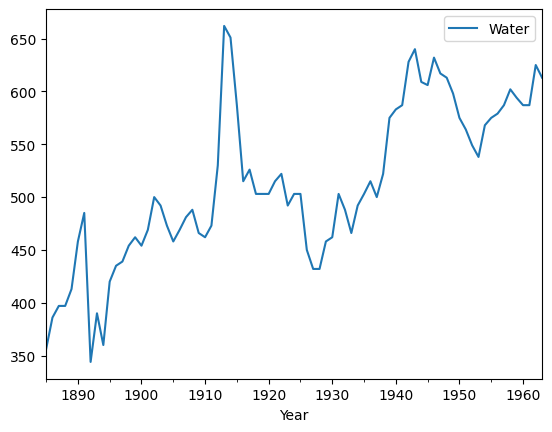

In [ ]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
series.plot()
pyplot.show()

array([[<Axes: title={'center': 'Water'}>]], dtype=object)

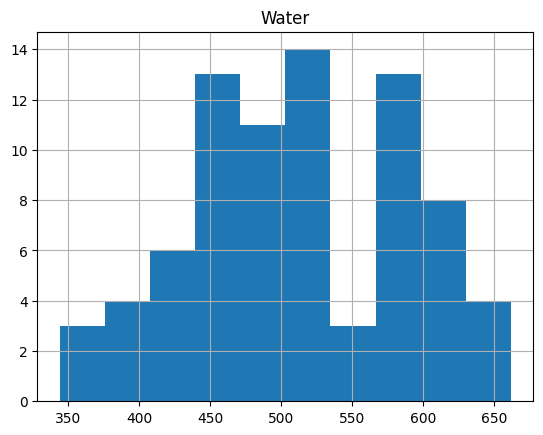

In [ ]:
series.hist()

<Axes: ylabel='Density'>

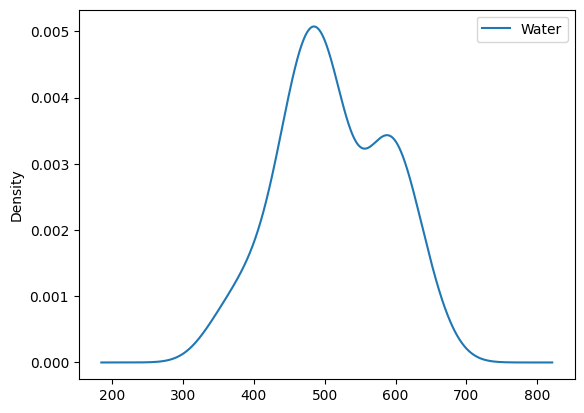

In [ ]:
series.plot(kind='kde')

In [ ]:
series.skew()

,0
Water,-0.028443


In [ ]:
# separate out a validation dataset
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 69, Validation 10


#### Persistence/ Base model

In [ ]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]


In [ ]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=503.000, Expected=503.000
>Predicted=503.000, Expected=503.000
>Predicted=503.000, Expected=515.000
>Predicted=515.000, Expected=522.000
>Predicted=522.000, Expected=492.000
>Predicted=492.000, Expected=503.000
>Predicted=503.000, Expected=503.000
>Predicted=503.000, Expected=450.000
>Predicted=450.000, Expected=432.000
>Predicted=432.000, Expected=432.000
>Predicted=432.000, Expected=458.000
>Predicted=458.000, Expected=462.000
>Predicted=462.000, Expected=503.000
>Predicted=503.000, Expected=488.000
>Predicted=488.000, Expected=466.000
>Predicted=466.000, Expected=492.000
>Predicted=492.000, Expected=503.000
>Predicted=503.000, Expected=515.000
>Predicted=515.000, Expected=500.000
>Predicted=500.000, Expected=522.000
>Predicted=522.000, Expected=575.000
>Predicted=575.000, Expected=583.000
>Predicted=583.000, Expected=587.000
>Predicted=587.000, Expected=628.000
>Predicted=628.000, Expected=640.000
>Predicted=640.000, Expected=609.000
>Predicted=609.000, Expected=606.000
>

/tmp/ipython-input-1970986772.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))


#### ARIMA Hyperparameters

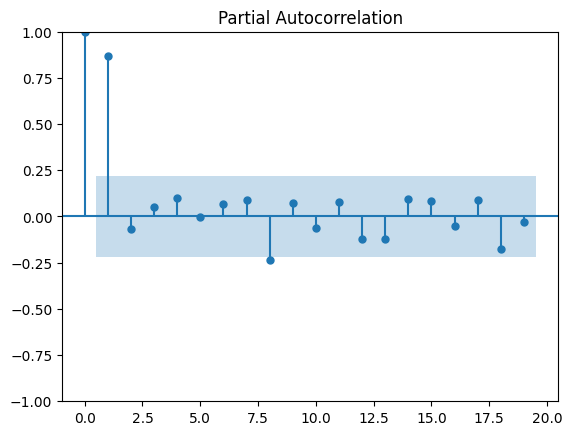

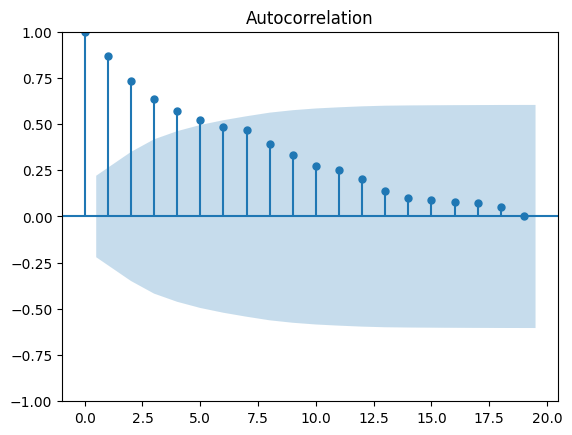

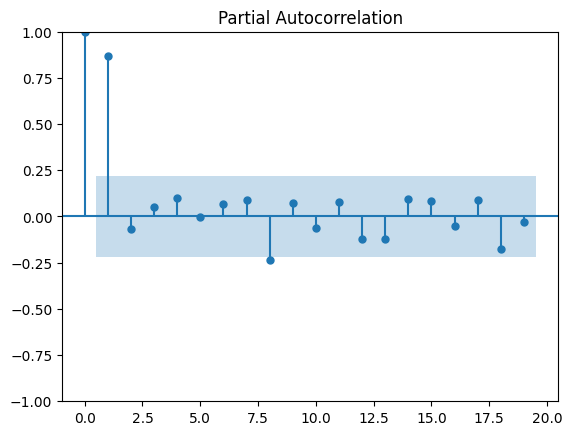

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(series)
plot_pacf(series)

#### Grid search for p,d,q values

In [ ]:
!pip install statsmodels --upgrade #Upgrade statsmodels to get the latest version


In [ ]:
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy

In [ ]:
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X=X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    #make predictions"
    predictions = list()
    for t in range(len(test)):
      model=ARIMA(history, order=arima_order)
      model_fit = model.fit()
      yhat = model_fit.forecast()[0]
      predictions.append(yhat)
      history.append(test[t])
    #calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                rmse = evaluate_arima_model(dataset, order)
                if rmse < best_score:
                        best_score, best_cfg = rmse, order
                print('ARIMA%s RMSE=%.3f' % (order,rmse))


    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True)
# evaluate parameters
p_values = range(0,3)
d_values = range(0, 3)
q_values = range(0,3)

warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=76.755
ARIMA(0, 0, 1) RMSE=47.347
ARIMA(0, 0, 2) RMSE=36.030
ARIMA(0, 1, 0) RMSE=21.975
ARIMA(0, 1, 1) RMSE=21.907
ARIMA(0, 1, 2) RMSE=22.178
ARIMA(0, 2, 0) RMSE=28.992
ARIMA(0, 2, 1) RMSE=22.314
ARIMA(0, 2, 2) RMSE=22.196
ARIMA(1, 0, 0) RMSE=23.957
ARIMA(1, 0, 1) RMSE=23.991
ARIMA(1, 0, 2) RMSE=25.384
ARIMA(1, 1, 0) RMSE=21.921
ARIMA(1, 1, 1) RMSE=21.879
ARIMA(1, 1, 2) RMSE=23.314
ARIMA(1, 2, 0) RMSE=27.464
ARIMA(1, 2, 1) RMSE=22.219
ARIMA(1, 2, 2) RMSE=22.782
ARIMA(2, 0, 0) RMSE=24.101
ARIMA(2, 0, 1) RMSE=24.113
ARIMA(2, 0, 2) RMSE=25.451
ARIMA(2, 1, 0) RMSE=21.732
ARIMA(2, 1, 1) RMSE=23.823
ARIMA(2, 1, 2) RMSE=27.510
ARIMA(2, 2, 0) RMSE=25.282
ARIMA(2, 2, 1) RMSE=22.064
ARIMA(2, 2, 2) RMSE=23.255
Best ARIMA(2, 1, 0) RMSE=21.732


#### Build Model based on the optimized values

In [ ]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [ ]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [ ]:
# fit model
from statsmodels.tsa.arima.model import ARIMA # Import the ARIMA model from the correct module
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)
#model_fit.plot_predict(1, 79)

In [ ]:
forecast

array([538.97253472, 540.09627577, 540.05186746, 539.9395635 ,
       539.93882115, 539.94980925, 539.95038117, 539.94932874,
       539.94922481, 539.94932338])

In [ ]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

54.37185528454863

#### Combine train and test data and build final model

In [ ]:
# fit model
data = read_csv('water.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = data.values
X = X.astype('float32')

In [ ]:
model = ARIMA(X, order=(3,1,6))
model_fit1 = model.fit()

In [ ]:
forecast=model_fit1.forecast(steps=10)

In [ ]:
X

array([[356.],
       [386.],
       [397.],
       [397.],
       [413.],
       [458.],
       [485.],
       [344.],
       [390.],
       [360.],
       [420.],
       [435.],
       [439.],
       [454.],
       [462.],
       [454.],
       [469.],
       [500.],
       [492.],
       [473.],
       [458.],
       [469.],
       [481.],
       [488.],
       [466.],
       [462.],
       [473.],
       [530.],
       [662.],
       [651.],
       [587.],
       [515.],
       [526.],
       [503.],
       [503.],
       [503.],
       [515.],
       [522.],
       [492.],
       [503.],
       [503.],
       [450.],
       [432.],
       [432.],
       [458.],
       [462.],
       [503.],
       [488.],
       [466.],
       [492.],
       [503.],
       [515.],
       [500.],
       [522.],
       [575.],
       [583.],
       [587.],
       [628.],
       [640.],
       [609.],
       [606.],
       [632.],
       [617.],
       [613.],
       [598.],
       [575.],
       [56

In [ ]:
rmse = sqrt(mean_squared_error(val[1], forecast))

In [ ]:
rmse

24.33438081677056